In [ ]:
!pip install langgraph langsmith

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.1/140.1 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.9/379.9 kB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 13.8 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [ ]:
!pip install langchain langchain_groq langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 990.6/990.6 kB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 69.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.5/103.5 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.2 MB/s eta 0:00:00


In [ ]:
from google.colab import userdata

In [ ]:
import os
#os.environ["LANGCHAIN_API_KEY"] = "xxxx"
os.environ["LANGCHAIN_API_KEY"] = userdata.get('LANGSMITH_API_KEY')
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "langgraphproject"
#os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"

In [80]:
from langchain_groq import ChatGroq
import os
groq_api_key = userdata.get("GROQ_API_KEY")
#os.environ["GROQ_API_KEY"]=groq_api_key

In [ ]:
llm = ChatGroq(groq_api_key=groq_api_key,model_name = "Gemma2-9b-It")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7ad5e6970d00>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7ad5e69719c0>, model_name='Gemma2-9b-It', groq_api_key=SecretStr('**********'))

## LangGraph with Single Node

In [ ]:
## Simple ChatBOT using LangGraph

from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages

In [ ]:
class State(TypedDict):
  messages:Annotated[list,add_messages]

graph_builder = StateGraph(State)

In [ ]:
def chatbot(state:State):
  return {"messages": [llm.invoke(state["messages"])]}

In [ ]:
graph_builder.add_node("chatbot",chatbot)
graph_builder

In [ ]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

In [ ]:
graph = graph_builder.compile()

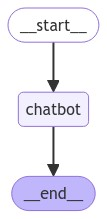

In [ ]:
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [ ]:
while True:
  user_input=input("user:")
  if user_input.lower() in ["quit","q"]:
    print("Bye")
    break
  for event in graph.stream({"messages":[{"role":"user","content":user_input}]}):
    for value in event.values():
      print(value)

In [ ]:
while True:
  user_input=input("User:")
  if user_input.lower() in["quit","q"]:
    print("Good Bye")
    break
  for event in graph.stream({'messages':("user",user_input)}):
    for value in event.values():
      print("Assistant :",value["messages"][-1].content)

## LangGraph with Multiple Nodes

In [ ]:
## Graph With Multiple Nodes
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition


In [ ]:
!pip install arxiv wikipedia

In [ ]:
### Working With Tools
from langchain_community.utilities import ArxivAPIWrapper,WikipediaAPIWrapper
from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun

## Arxiv and wikipedia Tools
arxiv_wrapper=ArxivAPIWrapper(top_k_results=1, doc_content_chars_max=200)
arxiv=ArxivQueryRun(api_wrapper=arxiv_wrapper)

api_wrapper=WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=200)
wiki=WikipediaQueryRun(api_wrapper=api_wrapper)

In [ ]:
result = wiki.invoke("who is Elon Musk")
print(result)

result1= arxiv.invoke("what is Elon Musk")
print(result1)


Page: Views of Elon Musk
Summary: Elon Musk is the CEO or owner of multiple companies including Tesla, SpaceX, and X Corp, and has expressed many views on a wide variety of subjects, ranging from poli
Published: 2023-04-21
Title: The "Non-Musk Effect" at Twitter
Authors: Dmitry Zinoviev, Arkapravo Sarkar, Pelin Bicen
Summary: Elon Musk has long been known to significantly impact Wall Street through


In [ ]:
tools = [wiki]

In [ ]:
class State(TypedDict):
  messages:Annotated[list,add_messages]


graph_builder = StateGraph(State)

llm_with_tools =llm.bind_tools(tools=tools)

In [ ]:
def chatbot(state:State):
  return {"messages": [llm_with_tools.invoke(state["messages"])]}

In [ ]:
graph_builder.add_node("chatbot",chatbot)
tool_node = ToolNode(tools=tools)
graph_builder.add_node("tools",tool_node)

graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
)

graph_builder.add_edge("tools","chatbot")
graph_builder.add_edge(START,"chatbot")
#graph_builder.add_edge("chatbot",END)

In [ ]:
graph = graph_builder.compile()

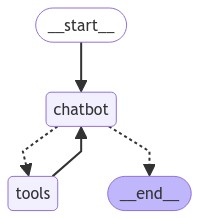

In [ ]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [81]:
user_input = input("user:")

# The config is the **second positional argument** to stream() or invoke()!
events = graph.stream(
    {"messages": [("user", user_input)]},stream_mode="values"
)
for event in events:
    event["messages"][-1].pretty_print()

user:What is the capital of India ?
================================ Human Message =================================

What is the capital of India ?
================================== Ai Message ==================================
Tool Calls:
  wikipedia (call_kgee)
 Call ID: call_kgee
  Args:
    query: Capital of India
================================= Tool Message =================================
Name: wikipedia

Page: National Capital Region (India)
Summary: The National Capital Region (NCR; ISO: Rāṣṭrīya Rājadhānī Kṣētra) is a planning region centered upon the National Capital Territory (NCT) of Delhi in Ind
================================== Ai Message ==================================

The capital of India is Delhi.


In [82]:
user_input = input("user:")

# The config is the **second positional argument** to stream() or invoke()!
events = graph.stream(
    {"messages": [("user", user_input)]},stream_mode="values"
)
for event in events:
    event["messages"][-1].pretty_print()

user:What are LLM Agents
================================ Human Message =================================

What are LLM Agents
================================== Ai Message ==================================
Tool Calls:
  wikipedia (call_x33z)
 Call ID: call_x33z
  Args:
    query: LLM Agents
================================= Tool Message =================================
Name: wikipedia

Page: Large language model
Summary: A large language model (LLM) is a computational model notable for its ability to achieve general-purpose language generation and other natural language processing t
================================== Ai Message ==================================
Tool Calls:
  wikipedia (call_3hmc)
 Call ID: call_3hmc
  Args:
    query: LLM Agents
================================= Tool Message =================================
Name: wikipedia

Page: Large language model
Summary: A large language model (LLM) is a computational model notable for its ability to achieve general-purpose l